## Daniela Jiménez Téllez

### A01654798

---

# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo.

---

## Importación de librerías

In [90]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

## Importación de datos

In [91]:
semilla = np.random.seed(4798)

In [92]:
df = pd.read_csv("Valhalla23.csv")

In [93]:
df

,Celsius,Valks
0,61.4720,-139.7400
1,70.5790,-156.6000
2,-7.3013,73.2690
3,71.3380,-165.4200
4,43.2360,-75.8350
...,...,...
95,-7.0094,69.6320
96,36.8820,-71.2400
97,26.9390,-34.2550
98,-18.8100,106.4300


### División de datos en 40% entrenamiento, 40% validación y 20% prueba

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
train_val_set, test_set = train_test_split(df, test_size = 0.2, random_state = semilla)

train_set, val_set = train_test_split(train_val_set, test_size = 0.5, random_state = semilla)

### Modelo SGDRegressor

In [96]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [97]:
X_train = train_set.drop(columns = ["Valks"])
y_train = train_set["Valks"]

X_val = val_set.drop(columns = ["Valks"])
y_val = val_set["Valks"]

X_test = test_set.drop(columns = ["Valks"])
y_test = test_set["Valks"]

sgd_regressor = SGDRegressor(learning_rate = "constant", eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000)

### Error cuadrático (MSE)

In [98]:
y_train_pred = sgd_regressor.predict(X_train)
y_val_pred = sgd_regressor.predict(X_val)
y_test_pred = sgd_regressor.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE en el conjunto de entrenamiento es: {mse_train:.4f}")
print(f"MSE en el conjunto de validación es: {mse_val:.4f}")
print(f"MSE en el conjunto de prueba es: {mse_test:.4f}")

MSE en el conjunto de entrenamiento es: 1241.7502
MSE en el conjunto de validación es: 1188.9022
MSE en el conjunto de prueba es: 820.8457


### Gráfica de los subconjuntos de datos vs. las predicciones

In [99]:
X_combined = np.concatenate([X_train, X_val, X_test])
X_range = np.linspace(X_combined.min(), X_combined.max(), 100).reshape(-1, 1)
X_range = pd.DataFrame(X_combined, columns = [X_train.columns[0]])

y_model = sgd_regressor.predict(X_range)

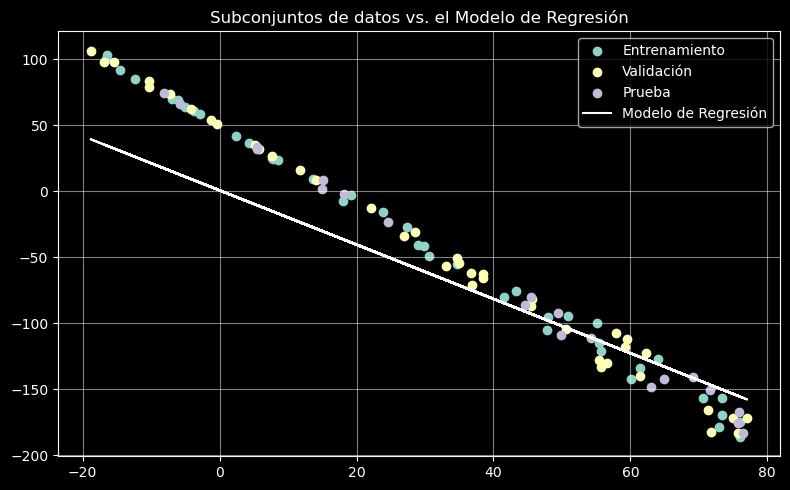

In [100]:
plt.figure(figsize = (8, 5))

plt.scatter(X_train, y_train, label = "Entrenamiento")
plt.scatter(X_val, y_val, label = "Validación")
plt.scatter(X_test, y_test, label = "Prueba")

plt.plot(X_range, y_model, color = "white", label = "Modelo de Regresión")

plt.title("Subconjuntos de datos vs. el Modelo de Regresión")

plt.legend()
plt.grid(True, alpha = 0.5)
plt.tight_layout()

plt.show()

### Modelos basados en la lista de 20 elementos, con su MSE y el promedio de este

In [101]:
elementos = random.sample(range(3, 40), 19)
elementos.append(2)
elementos.sort()

elementos

[2, 3, 6, 7, 11, 12, 13, 15, 16, 17, 19, 21, 22, 23, 24, 26, 27, 30, 32, 36]

In [102]:
resultados = []

promedio_mse_train = []
promedio_mse_val = []

for elemento in elementos:

    mse_train_list = []
    mse_val_list = []
    
    for i in range(100):
        
        subset_indices = random.sample(range(X_train.shape[0]), elemento)
        X_subset = X_train.iloc[subset_indices]
        y_subset = y_train.iloc[subset_indices]
        
        model = SGDRegressor(learning_rate = "constant", eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
        model.fit(X_subset, y_subset)
        
        
        y_subset_pred = model.predict(X_subset)
        mse_train = mean_squared_error(y_subset, y_subset_pred)
        mse_train_list.append(mse_train)
        
        y_val_pred = model.predict(X_val)
        mse_val = mean_squared_error(y_val, y_val_pred)
        mse_val_list.append(mse_val)

        mean_mse_train = np.mean(mse_train_list)
        
        mean_mse_val = np.mean(mse_val_list)
        
        resultados.append((elemento, mean_mse_train, mean_mse_val))

    promedio_mse_train.append(np.mean(mse_train_list))
    promedio_mse_val.append(np.mean(mse_val_list))

for elemento, mean_mse_train, mean_mse_val in resultados:
    print(f"Tamaño: {elemento}, MSE Promedio Entrenamiento: {mean_mse_train:.4f}")
    print(f"           MSE Promedio Validación: {mean_mse_val:.4f}")

Tamaño: 2, MSE Promedio Entrenamiento: 31.5556
           MSE Promedio Validación: 1269.5750
Tamaño: 2, MSE Promedio Entrenamiento: 15.8593
           MSE Promedio Validación: 1516.4383
Tamaño: 2, MSE Promedio Entrenamiento: 12.7286
           MSE Promedio Validación: 1035.6341
Tamaño: 2, MSE Promedio Entrenamiento: 12.5691
           MSE Promedio Validación: 1121.3356
Tamaño: 2, MSE Promedio Entrenamiento: 14.9788
           MSE Promedio Validación: 922.9547
Tamaño: 2, MSE Promedio Entrenamiento: 15.9995
           MSE Promedio Validación: 1008.9298
Tamaño: 2, MSE Promedio Entrenamiento: 34.7682
           MSE Promedio Validación: 1044.5805
Tamaño: 2, MSE Promedio Entrenamiento: 31.0843
           MSE Promedio Validación: 922.4424
Tamaño: 2, MSE Promedio Entrenamiento: 28.5688
           MSE Promedio Validación: 828.7327
Tamaño: 2, MSE Promedio Entrenamiento: 28.0111
           MSE Promedio Validación: 1020.3035
Tamaño: 2, MSE Promedio Entrenamiento: 29.0317
           MSE Promedio Va

In [103]:
print("Errores promedio en el conjunto de entrenamiento para cada tamaño:")
print(promedio_mse_train)

print("\nErrores promedio en el conjunto de validación para cada tamaño:")
print(promedio_mse_val)

Errores promedio en el conjunto de entrenamiento para cada tamaño:
[47.283201785297024, 73.35937795203522, 331.6936439334729, 516.742857298535, 1067.7465101498021, 1014.0242271713373, 1061.724395653624, 1113.783999021574, 1039.9403940840473, 1158.841241286286, 1186.5662544108525, 1151.3823049419368, 1136.0015550088062, 1164.5785374349775, 1194.4624632010384, 1177.4967022857368, 1164.083644107098, 1204.3026052165396, 1167.1720377269232, 1162.2920537969942]

Errores promedio en el conjunto de validación para cada tamaño:
[2928.8460929133416, 168.41010588225868, 432.37331812901147, 620.4158851170254, 1078.4738067165395, 1030.4729503698818, 1079.4038173704876, 1101.5745243185927, 1036.6387651121615, 1151.0111663632554, 1172.9777114007547, 1123.6690626960497, 1118.4949210056072, 1146.797781776834, 1148.2444006177104, 1142.6661596368635, 1123.5358048585858, 1156.1606595331589, 1128.0237632740073, 1111.9990279506235]


In [104]:
# Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base

promedio_mse_train.append(mse_train)
promedio_mse_val.append(mse_val)

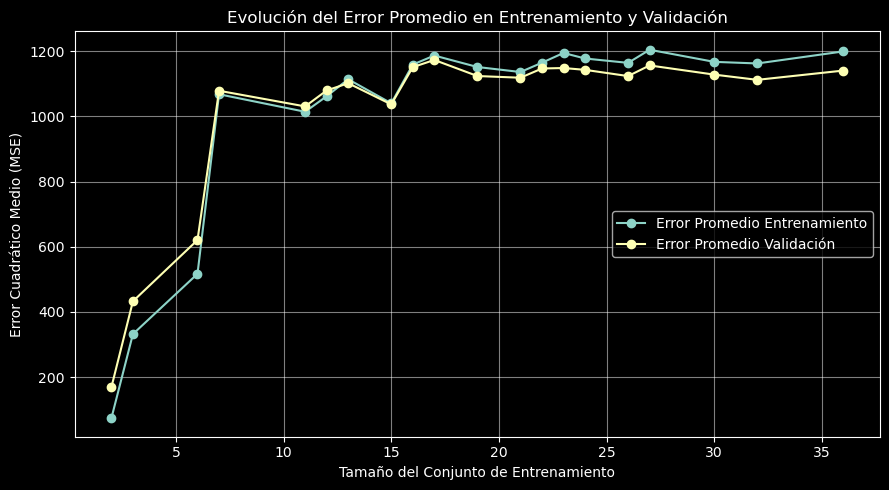

In [105]:
# Gráfica de la evolución del error promedio

tamaños = [len(X_train)] + elementos

plt.figure(figsize = (9, 5))
plt.plot(tamaños[1:], promedio_mse_train[1:], label = "Error Promedio Entrenamiento", marker = "o")
plt.plot(tamaños[1:], promedio_mse_val[1:], label = "Error Promedio Validación", marker = "o")

plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Evolución del Error Promedio en Entrenamiento y Validación")

plt.legend(loc = "right")
plt.grid(True, alpha = 0.5)
plt.tight_layout()
plt.show()

Con base en la gráfica y resultados anteriores, se puede decir que el modelo entrenado con dos muestras tiene alto sesgo y varianza. Esto se debe a que no hay suficiente información para poder generalizar de manera correcta, por lo que el modelo se sobreajusta. Por otro lado, en el caso de 40 muestras se nota una mejora, la cual reduce tanto el sesgo como la varianza. Esto quiere decir que hay un mejor ajuste a los datos gracias a la cantidad de muestras, lo que permite que se puedan generalizar los datos de mejor manera.

Habiendo dicho esto, se concluye que a medida de que el número de muestras crece, el modelo tiene mejor rendimiento. Obvservando la gráfica se puede notar que a partir **20 muestras** el MSE se empieza a estabilizar, lo que nos dice que el modelo empieza a tener un mejor y constante rendimiento. Asimismo, en cuanto a la varianza y el sesgo se puede notar que no hay tanta discrepancia entre ellos, por lo que hay un buen balance.

Entrenando un nuevo modelo con 20 muestras, se tiene lo siguiente:


In [106]:
# Modelo con 20 muestras

subset_indices = random.sample(range(X_train.shape[0]), 20)

X_subset = X_train.iloc[subset_indices]
y_subset = y_train.iloc[subset_indices]

model = SGDRegressor(learning_rate = "constant", eta0 = 1e-4, max_iter = 1000000, random_state = semilla)
model.fit(X_subset, y_subset)

y_subset_pred = model.predict(X_subset)
mse_train_subset = mean_squared_error(y_subset, y_subset_pred)

y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)

y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE en el subconjunto de entrenamiento de 20 muestras : {mse_train_subset:.4f}")
print(f"MSE en el conjunto de validación: {mse_val:.4f}")
print(f"MSE en el conjunto de prueba: {mse_test:.4f}")

MSE en el subconjunto de entrenamiento de 20 muestras : 1582.7857
MSE en el conjunto de validación: 1208.3418
MSE en el conjunto de prueba: 881.7059


Al comparar el modelo con 20 muestras contra el modelo de la línea base, se puede ver que el MSE del modelo con menos muestras es más grande. A pesar de esto, este modelo tiene resultados decentes.

Finalmente, se puede decir que en general, la configuración que funcionó mejor fue la de la línea base ya que tiene menos error (MSE) en los conjuntos de validación y prueba a comparación de los demás modelos. A pesar de esto, el modelo de 20 muestras mostró un buen balance en general, y puede ser una opción viable. 